In [1]:
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa.display
import keras
import datetime
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA\

plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (10, 10
                                 ) 
plt.rcParams['axes.grid']=False
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']
bbox_props = dict(boxstyle="round,pad=0.3", fc=colors[0], alpha=.5)

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

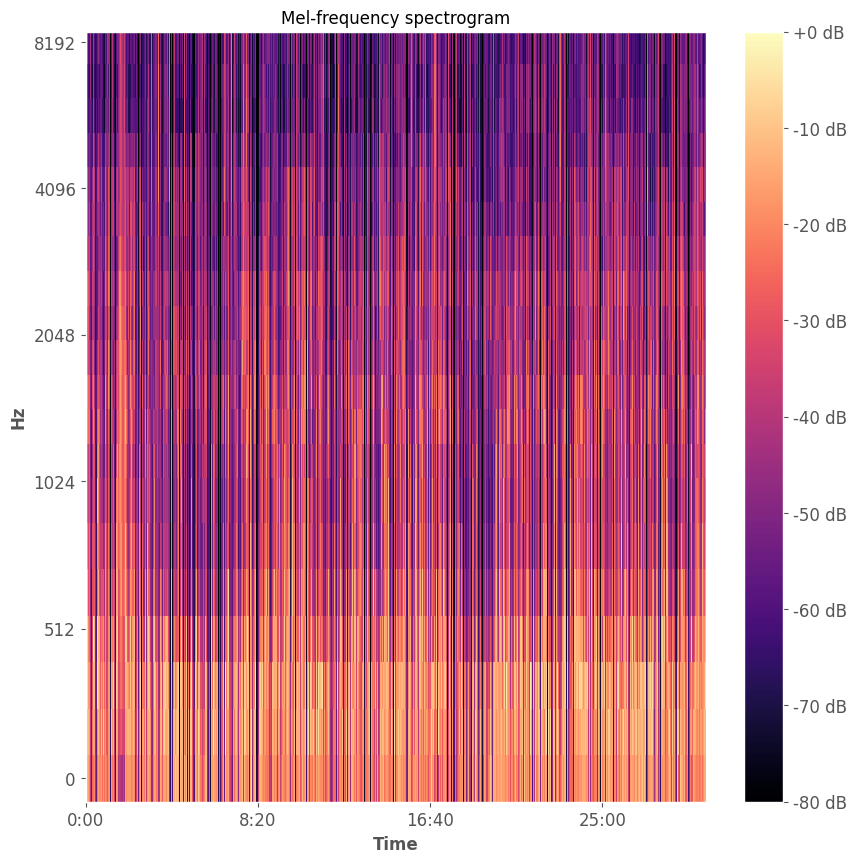

In [2]:
y,sr = librosa.load('trimmed.mp3')
dur_time = librosa.get_duration(y=y,sr=sr)
time_sec = round(dur_time)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=20, fmax=8000)
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',y_axis='mel', sr=sr,fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')
#plt.xlim(60,120)

In [3]:
start = 0 
end = time_sec 
time_series_sec = np.linspace(start,end,len(S_dB[0]))

In [4]:
data = pd.read_csv('us_election_2020_1st_presidential_debate.csv')

In [5]:
def convert_to_sec(time_string):
    time_s_list = time_string.split(':')
    if len(time_s_list)>2:
        date_time = datetime.datetime.strptime(time_string, "%H:%M:%S")
        a_timedelta = date_time - datetime.datetime(1900, 1, 1)
        seconds = a_timedelta.total_seconds()
    else:
        date_time = datetime.datetime.strptime(time_string, "%M:%S")
        a_timedelta = date_time - datetime.datetime(1900, 1, 1)
        seconds = a_timedelta.total_seconds()
    return seconds

In [6]:
minute_list = data.minute.tolist()

In [7]:
SEC_LIST = []
for t in minute_list:
    try:
        SEC_LIST.append(convert_to_sec(t))
    except:
        SEC_LIST.append(0)
for k in range(2):
    for i in range(len(SEC_LIST)-1):
        if SEC_LIST[i]==SEC_LIST[i+1]:
            SEC_LIST[i+1]=SEC_LIST[i]+1
turn_index = SEC_LIST.index(0)
to_add = SEC_LIST[turn_index-1]
for j in range(turn_index,len(SEC_LIST)):
    SEC_LIST[j]=SEC_LIST[j]+to_add
data['Seconds']=SEC_LIST

In [8]:
data.head()

,speaker,minute,text,Seconds
0,Chris Wallace,01:20,Good evening from the Health Education Campus ...,80.0
1,Chris Wallace,02:10,This debate is being conducted under health an...,130.0
2,Vice President Joe Biden,02:49,"How you doing, man?",169.0
3,President Donald J. Trump,02:51,How are you doing?,171.0
4,Vice President Joe Biden,02:51,I’m well.,172.0


In [9]:
new_data = data[data.Seconds<=time_series_sec.max()]
new_data.speaker = new_data.speaker.replace({'Chris Wallace:':'Chris Wallace'})

C:\Users\jseer\AppData\Local\Temp\ipykernel_1960\4195345583.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.speaker = new_data.speaker.replace({'Chris Wallace:':'Chris Wallace'})


In [10]:
max_sec = new_data.Seconds.max()

In [11]:
new_data.drop_duplicates(subset='speaker')

,speaker,minute,text,Seconds
0,Chris Wallace,01:20,Good evening from the Health Education Campus ...,80.0
2,Vice President Joe Biden,02:49,"How you doing, man?",169.0
3,President Donald J. Trump,02:51,How are you doing?,171.0


C:\Users\jseer\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jseer\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jseer\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


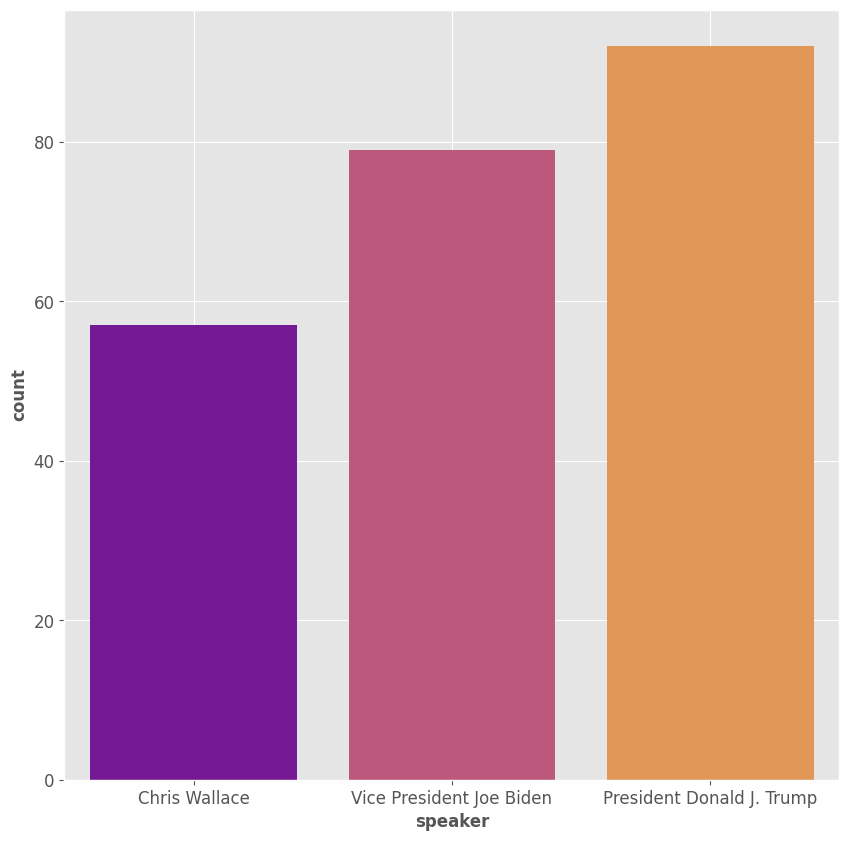

In [12]:
sns.countplot(x='speaker', data=new_data, palette='plasma')
plt.grid(True)
plt.show()

In [13]:
audio_data = pd.DataFrame(S_dB)

In [14]:
audio_data = audio_data.T

In [15]:
audio_data.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
77515,-14.648183,-13.690556,-4.418774,-15.761371,-26.027403,-27.798998,-25.151863,-23.852543,-32.926834,-43.370171,-43.765091,-43.510986,-41.115547,-41.641937,-47.682251,-54.778358,-56.011673,-54.510155,-56.569336,-63.456680
77516,-17.770279,-16.927727,-6.329973,-14.468240,-18.217569,-22.991423,-26.815201,-22.090673,-23.430490,-37.996574,-40.696705,-42.106369,-36.800606,-37.004852,-46.787636,-51.606194,-55.651115,-47.546417,-48.860046,-60.291466
77517,-18.021223,-15.746787,-10.707511,-13.443325,-16.855057,-24.670553,-26.839039,-19.061644,-20.191114,-33.452572,-39.395859,-41.702530,-33.050934,-35.360321,-47.931290,-48.660797,-53.660072,-43.329887,-43.968037,-56.051025
77518,-19.683842,-17.083801,-14.897894,-17.880375,-23.684444,-33.503456,-31.333130,-23.593615,-24.309433,-36.212730,-44.166176,-44.208031,-35.080975,-39.198322,-50.513573,-51.411858,-55.220200,-45.836739,-46.271019,-58.191017
77519,-27.436760,-26.697992,-26.909214,-33.687141,-42.025955,-48.791363,-47.727623,-40.666656,-37.783340,-51.329956,-58.252769,-56.492973,-49.337585,-54.877449,-61.906975,-63.152977,-65.192970,-57.825378,-58.462326,-67.380325


In [16]:
pca = PCA(n_components=4)
pca.fit(audio_data)

PCA(n_components=4)

In [17]:
pca_data = pd.DataFrame(pca.transform(audio_data))

In [18]:
audio_time = np.array(pca_data.index.tolist())*max_sec/np.array(pca_data.index.tolist()).max()
nd_time_list = [0]+new_data.Seconds.tolist()
CLASS = []
for j in range(len(audio_time)):
    time_j = audio_time[j]
    for i in range(1,len(nd_time_list)):
        start_i = nd_time_list[i-1]
        end_i = nd_time_list[i]
        if time_j>start_i and time_j<end_i:
            CLASS.append(new_data.loc[i-1].speaker)

In [19]:
pca_data['speaker']=CLASS[0:len(pca_data)]
pca_data['Time']=audio_time
pca_data.head()

,0,1,2,3,speaker,Time
0,165.402557,14.285132,22.823095,-4.147709,Chris Wallace,0.000000
1,151.373489,4.273831,11.340566,-0.017499,Chris Wallace,0.022975
2,143.981537,1.169698,10.193157,-1.398982,Chris Wallace,0.045950
3,146.945633,2.904347,8.755507,0.018233,Chris Wallace,0.068925
4,144.620361,3.928491,10.801961,-2.920823,Chris Wallace,0.091900


C:\Users\jseer\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jseer\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jseer\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jseer\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

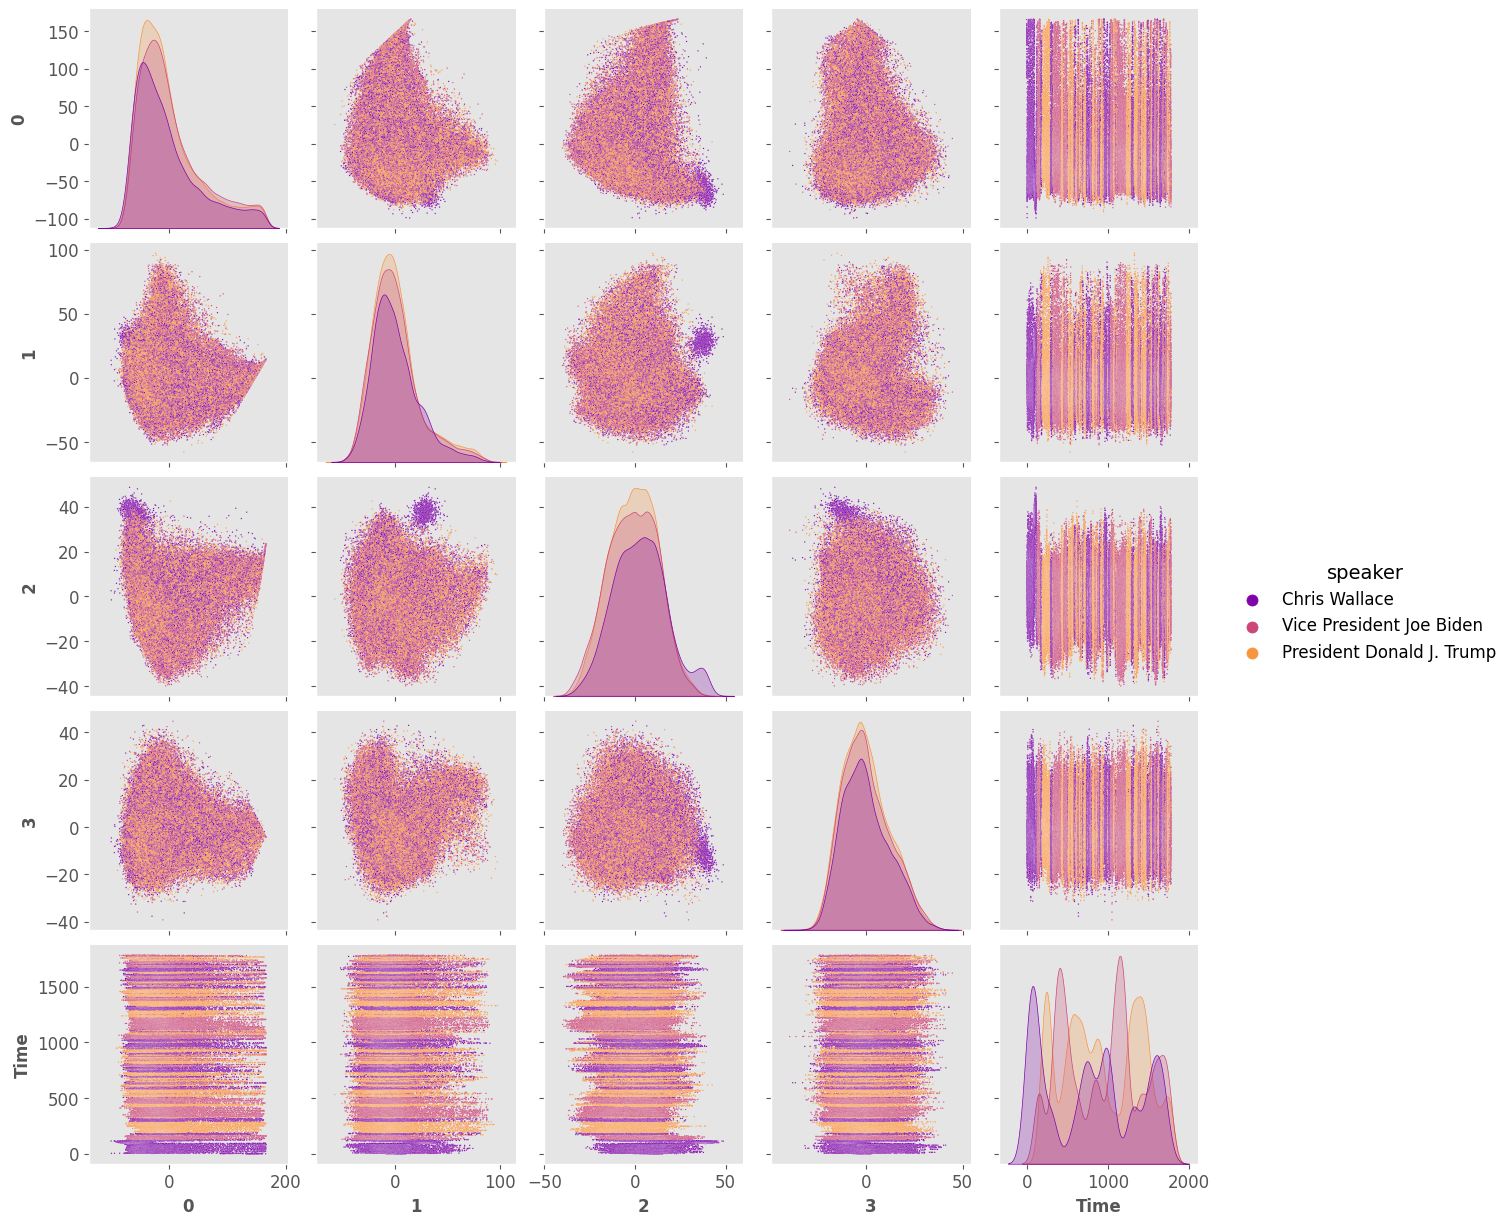

In [20]:
#plt.grid(True)
sns.pairplot(pca_data,hue='speaker',plot_kws={'s':1},palette='plasma')

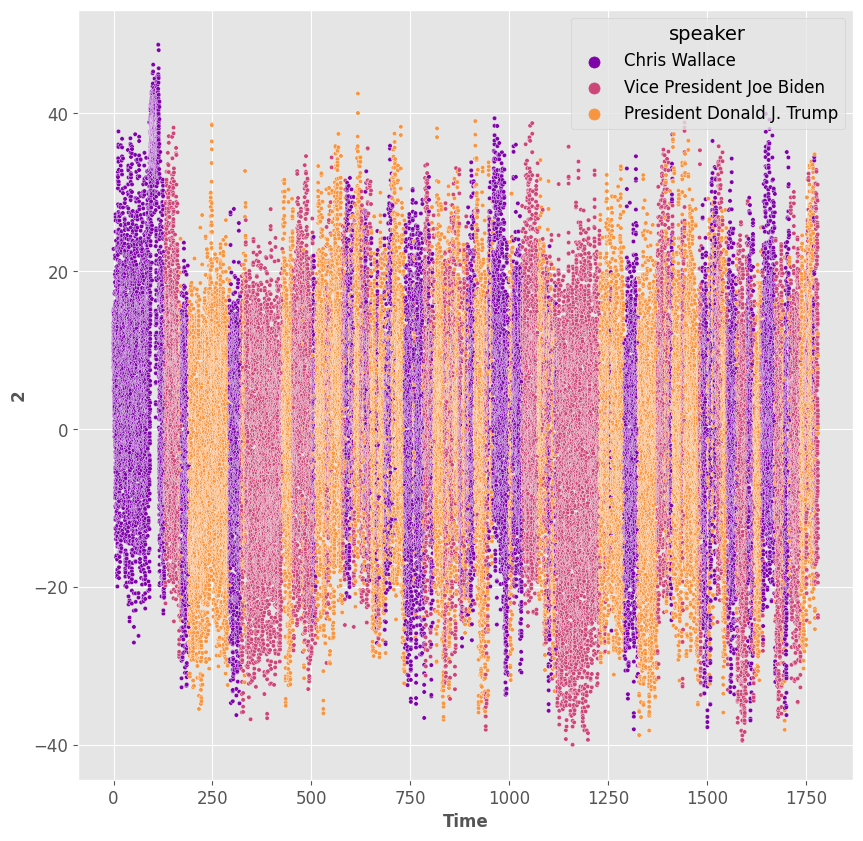

In [21]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.feature_selection import mutual_info_classif as mi
import seaborn as sns
import matplotlib.pyplot as plt

# Perform feature selection (assuming 'speaker' is a categorical target variable)
selected_features = ['Time', 2]
X = pca_data[selected_features]
y = pca_data['speaker']
mutual_info = mi(X=X, y=y)

# Print or use 'mutual_info' for feature ranking if needed

# Create a DataFrame with selected features and 'speaker' for plotting
time_series_data = pca_data[selected_features + ['speaker']]

# Create a scatterplot using the correct y-axis variable
sns.scatterplot(x='Time', y=2, hue='speaker', data=time_series_data, s=10, palette='plasma')
plt.grid(True)
